<div style="width:100%;text-align: top;"> <img align=middle src="https://mmo.aiircdn.com/141/5ed59862e602f.png" alt="Heat beating" style="height:400px;margin-top:1rem;"> </div>

## BUILDING ENERGY CONSUMPTION ANALYSIS

Climate change is a global challenge and carbon pollution knows no boundaries.<br>
In 2011, Seattle adopted the goal to become carbon neutral by 2050. The overall approach to carbon reductions in the buildings is to provide information, financial and other incentives, and technical assistance, while establishing strong standards for efficiency and emissions. <br>
As part of the City of Seattle, our team will focus on Green House Gas Emissions from non residential buildings.<br>
Our final objective is to predict CO2 emissions and the Total Energy Use for buildings that do not have yet any measurements.  <br>
To achieve this

In [652]:
#! usr/bin/env python 3
# coding: utf-8

# Importing librairies

import numpy as np                # numerical data processing
import pandas as pd               # numerical tables & time series
import scipy as sp                # numerical integration, interpolation, optimization, linear algebra, and statistics
import scipy.stats as st          # statistical functions
import seaborn as sns             # statistical data visualization
import matplotlib.pyplot as plt   # static, animated, and interactive visualizations in Python

from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from math import sqrt


In [653]:
# Transforming input files.csv to dataframes

df_data = pd.read_csv("data_cleaned.csv")
df_data = df_data.drop(['Unnamed: 0'], axis=1)
df_data.head(2)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,...,Address,City,State,ZipCode,AgeofBuilding,MeanBuildingGFA,MeanFloorGFA,PropertyUseTypeNumber,BuildingGFApct,ParkingGFApct
0,1,2015,NonResidential,Hotel,Mayflower Park Hotel,Downtown,1.0,12.0,88434,Hotel,...,405 Olive Way,Seattle,WA,98101.0,88,88434.0,7369.5,1,1.0,0.0
1,1,2016,NonResidential,Hotel,Mayflower Park Hotel,Downtown,1.0,12.0,88434,Hotel,...,405 Olive Way,Seattle,WA,98101.0,89,88434.0,7369.5,1,1.0,0.0


In [654]:
target_features = ['SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)']
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSEBuildingID                 3173 non-null   int64  
 1   DataYear                      3173 non-null   int64  
 2   BuildingType                  3173 non-null   object 
 3   PrimaryPropertyType           3173 non-null   object 
 4   PropertyName                  3173 non-null   object 
 5   Neighborhood                  3173 non-null   object 
 6   NumberofBuildings             3173 non-null   float64
 7   NumberofFloors                3173 non-null   float64
 8   PropertyGFATotal              3173 non-null   int64  
 9   LargestPropertyUseType        3104 non-null   object 
 10  YearsENERGYSTARCertified      183 non-null    object 
 11  ENERGYSTARScore               2104 non-null   float64
 12  SiteEnergyUse(kBtu)           3173 non-null   float64
 13  GHG

In [655]:
non_reg = ['YearsENERGYSTARCertified', 'Outlier']
df_data.drop(non_reg, axis=1, inplace=True)

In [656]:
loc_features = ['OSEBuildingID', 'PropertyName', 'Address', 'City', 'State', 'ZipCode']
df_data_loc = df_data[loc_features]
df_data.drop(loc_features, axis=1, inplace = True)

In [657]:
space = ['Latitude', 'Longitude']
df_data_nonloc = df_data.drop(space, axis=1)

In [658]:
df_data_non_ener = df_data_nonloc.drop(['ENERGYSTARScore'], axis=1)
df_data_non_ener['DataYear'] = df_data_non_ener['DataYear'].astype(str)

In [659]:
df_data_non_ener.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DataYear                      3173 non-null   object 
 1   BuildingType                  3173 non-null   object 
 2   PrimaryPropertyType           3173 non-null   object 
 3   Neighborhood                  3173 non-null   object 
 4   NumberofBuildings             3173 non-null   float64
 5   NumberofFloors                3173 non-null   float64
 6   PropertyGFATotal              3173 non-null   int64  
 7   LargestPropertyUseType        3104 non-null   object 
 8   SiteEnergyUse(kBtu)           3173 non-null   float64
 9   GHGEmissions(MetricTonsCO2e)  3173 non-null   float64
 10  AgeofBuilding                 3173 non-null   int64  
 11  MeanBuildingGFA               3173 non-null   float64
 12  MeanFloorGFA                  3173 non-null   float64
 13  Pro

In [660]:
df_data_non_ener['LargestPropertyUseType'] = df_data_non_ener['LargestPropertyUseType'].fillna("Nodata")

In [661]:
numerical_features = df_data_non_ener.select_dtypes(include=['int64','float64'])
categorical_features = df_data_non_ener.select_dtypes(exclude=['int64','float64']) 

In [662]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NumberofBuildings             3173 non-null   float64
 1   NumberofFloors                3173 non-null   float64
 2   PropertyGFATotal              3173 non-null   int64  
 3   SiteEnergyUse(kBtu)           3173 non-null   float64
 4   GHGEmissions(MetricTonsCO2e)  3173 non-null   float64
 5   AgeofBuilding                 3173 non-null   int64  
 6   MeanBuildingGFA               3173 non-null   float64
 7   MeanFloorGFA                  3173 non-null   float64
 8   PropertyUseTypeNumber         3173 non-null   int64  
 9   BuildingGFApct                3173 non-null   float64
 10  ParkingGFApct                 3173 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 272.8 KB


In [663]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DataYear                3173 non-null   object
 1   BuildingType            3173 non-null   object
 2   PrimaryPropertyType     3173 non-null   object
 3   Neighborhood            3173 non-null   object
 4   LargestPropertyUseType  3173 non-null   object
dtypes: object(5)
memory usage: 124.1+ KB


### LINEAR REGRESSION

In order to create a regression model that can the numerical features to the Energy Use or GHG Emissions, a baseline model will be built to get a basis for comparison. Linear regression will then be computed and compared to the baseline to check any improvement in our model.

Step 1: __DATA SELECTION__

In [664]:
# Data Selection 
y = df_data_non_ener['SiteEnergyUse(kBtu)'].values
X = numerical_features.drop(target_features, axis=1)


Step 2: __STANDARDIZATION__<br>

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler results in a distribution with a standard deviation equal to 1. 

In [665]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Step 3: __TRAIN-TEST SPLIT EVALUATION__<br>

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.<br>
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

In [666]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Step 4: __BASELINE CREATION__<br>

The Dummy Regressor is a kind of Regressor that gives prediction based on simple strategies without paying any attention to the input Data. The sklearn library provides Dummy Regressor which is used to set up a baseline for comparing Linear Regression for instance. Training the dummy model is similar to training any regular regression model, except for the strategies. The main role of strategy is to predict target values without any influence of the training data. We are here using the strategy "mean" which is the default strategy used by the Dummy Regressor. It always predicts the mean of the training target values.

In [667]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)
dummy_pred = dummy_reg.predict(X_test)

To evaluate our regression model, we compute few meaningful prameters to estimate how far our predictions are from the actual data:

__MAE__ is the sum of absolute differences between our target and predicted variables.<br>
__MSE__ measures the average squared difference between the estimated values and the actual value.<br>
__RMSE__ is the standard deviation of the residuals.<br>
__RSS__ is the residuals sum of squares.<br>
__R²__ is the coefficient of determination and evaluates the scatter of the data points around the fitted regression line.

In [705]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def algo_model(y_actual, y_forecast):
    """Return metrics for model evaluation in regression"""
    
    y_actual, y_forecast = np.array(y_actual), np.array(y_forecast)
    
    mae = mean_absolute_error(y_actual, y_forecast)
    rss = np.sum((y_actual - y_forecast)**2)
    mse = mean_squared_error(y_actual, y_forecast)
    rmse = np.sqrt(mse)
    
    functions = {"Functions":["Mean Absolute Error (MAE)", "Residual Sum of Squares (RSS)",
                              "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
                              "Coefficient of determination (R²)"],
                              "Results":[mae, rss, mse, rmse, r2_score(y_actual, y_forecast)]}
    
    df_functions = pd.DataFrame(functions) 
    return df_functions

dummy_metrics = algo_model(y_test, dummy_pred).rename(columns={'Results':'Baseline'})
dummy_metrics.index = np.arange(1, len(dummy_metrics)+1)
dummy_metrics

,Functions,Baseline
1,Mean Absolute Error (MAE),8.665980e+06
2,Residual Sum of Squares (RSS),3.586807e+17
3,Mean Squared Error (MSE),3.767654e+14
4,Root Mean Squared Error (RMSE),1.941045e+07
5,Coefficient of determination (R²),-5.615692e-04


As can be seen from the above result, the expected Dummy Regressor always predict the R² score as 0, since it is always predicting a constant without having an insight of the output. This baseline will be a useful point for comparison with our linear regression.

Step 5-1: __LINEAR REGRESSION__<br>


The simplest form of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable. The input variables are assumed to have a Gaussian distribution. Another assumption is that the predictors are not highly correlated with each other (a problem called multi-collinearity).

In [669]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
regr_forecast = regr.predict(X_test)
regr_metrics = algo_model(y_test, regr_forecast).rename(columns={'Results':'Linear Regression'})
regr_metrics.index = np.arange(1, len(regr_metrics)+1)
regr_metrics = pd.concat([dummy_metrics,regr_metrics['Linear Regression']], axis=1)
round(regr_metrics, 2)

,Functions,Baseline,Linear Regression
1,Mean Absolute Error (MAE),8.665980e+06,5.267541e+06
2,Residual Sum of Squares (RSS),3.586807e+17,2.089391e+17
3,Mean Squared Error (MSE),3.767654e+14,2.194739e+14
4,Root Mean Squared Error (RMSE),1.941045e+07,1.481465e+07
5,Coefficient of determination (R²),-0.000000e+00,4.200000e-01


As seen in this table, the coefficient of determination R² is much better than for the baseline which indicates that the performed linear regression is a better fit for our data but still far away from a golden solution which would approach 1 in ideal conditions. Plotting the acual data vs. the forecasts, we can have a display of the trends of the data.

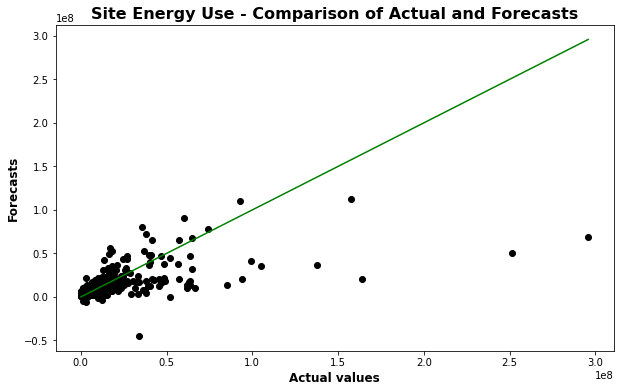

In [670]:
def forecast_comp(y_actual, y_forecast):
    X_plot = [y_actual.min(), y_actual.max()]
    fig = plt.figure(figsize=(10,6))
    plt.scatter(y_actual, y_forecast, color='black')
    plt.plot(X_plot, X_plot, color='g')
    #plt.plot(X_test, dummy_pred, color='red')
    plt.xlabel("Actual values", weight = "bold", fontsize=12)
    plt.ylabel("Forecasts", weight = "bold", fontsize=12)
    plt.title("Site Energy Use - Comparison of Actual and Forecasts", weight = "bold", fontsize=16)
    plt.show()
forecast_comp(y_actual=y_test, y_forecast = regr_forecast)


Step 5-2: __RIDGE REGRESSION__<br>

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

In [671]:

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
rr_forecast= rr.predict(X_test)
ridge_metrics = algo_model(y_test, rr_forecast).rename(columns={'Results':'Ridge Regression'})
ridge_metrics.index = np.arange(1, len(ridge_metrics)+1)
ridge_metrics = pd.concat([regr_metrics,ridge_metrics['Ridge Regression']], axis=1)
round(ridge_metrics, 2)


,Functions,Baseline,Linear Regression,Ridge Regression
1,Mean Absolute Error (MAE),8.665980e+06,5.267541e+06,5.267477e+06
2,Residual Sum of Squares (RSS),3.586807e+17,2.089391e+17,2.089326e+17
3,Mean Squared Error (MSE),3.767654e+14,2.194739e+14,2.194670e+14
4,Root Mean Squared Error (RMSE),1.941045e+07,1.481465e+07,1.481442e+07
5,Coefficient of determination (R²),-0.000000e+00,4.200000e-01,4.200000e-01


Step 5-3: __LASSO REGRESSION__<br>

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

In [672]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train) 
lasso_forecast= model_lasso.predict(X_test)
lasso_metrics = algo_model(y_test, lasso_forecast).rename(columns={'Results':'Lasso Regression'})
lasso_metrics.index = np.arange(1, len(lasso_metrics)+1)
lasso_metrics = pd.concat([ridge_metrics,lasso_metrics['Lasso Regression']], axis=1)
round(lasso_metrics, 2)


,Functions,Baseline,Linear Regression,Ridge Regression,Lasso Regression
1,Mean Absolute Error (MAE),8.665980e+06,5.267541e+06,5.267477e+06,5.267540e+06
2,Residual Sum of Squares (RSS),3.586807e+17,2.089391e+17,2.089326e+17,2.089391e+17
3,Mean Squared Error (MSE),3.767654e+14,2.194739e+14,2.194670e+14,2.194739e+14
4,Root Mean Squared Error (RMSE),1.941045e+07,1.481465e+07,1.481442e+07,1.481465e+07
5,Coefficient of determination (R²),-0.000000e+00,4.200000e-01,4.200000e-01,4.200000e-01


Step 5-3: __ELASTICNET REGRESSION__<br>

ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In [673]:
model_enet = ElasticNet(alpha = 0.1)
model_enet.fit(X_train, y_train) 
enet_forecast= model_enet.predict(X_test)
enet_metrics = algo_model(y_test, enet_forecast).rename(columns={'Results':'ElasticNet Regression'})
enet_metrics.index = np.arange(1, len(enet_metrics)+1)
enet_metrics = pd.concat([lasso_metrics,enet_metrics['ElasticNet Regression']], axis=1)
round(enet_metrics, 2)

,Functions,Baseline,Linear Regression,Ridge Regression,Lasso Regression,ElasticNet Regression
1,Mean Absolute Error (MAE),8.665980e+06,5.267541e+06,5.267477e+06,5.267540e+06,5.112701e+06
2,Residual Sum of Squares (RSS),3.586807e+17,2.089391e+17,2.089326e+17,2.089391e+17,2.021897e+17
3,Mean Squared Error (MSE),3.767654e+14,2.194739e+14,2.194670e+14,2.194739e+14,2.123841e+14
4,Root Mean Squared Error (RMSE),1.941045e+07,1.481465e+07,1.481442e+07,1.481465e+07,1.457340e+07
5,Coefficient of determination (R²),-0.000000e+00,4.200000e-01,4.200000e-01,4.200000e-01,4.400000e-01


### SECOND LINEAR REGRESSION: ONE HOT ENCODING

In order to improve our linear regression, we'll incorporate categorical variables and check if it gives values/improvement from our former linear regression.
A one hot encoding is a representation of categorical variables as binary vectors.
This first requires that the categorical values be mapped to integer values.
Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1. <br>

In [674]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# We incorporate categories for Energy Use in the regression

num_data = list(X.columns)
cat_data = list(categorical_features.columns)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=
                                 [('num', scaler, num_data),
                                  ('cat', categorical_transformer, cat_data)])

pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', LinearRegression())])

X1 = df_data_non_ener[num_data + cat_data]
y1 = df_data_non_ener['SiteEnergyUse(kBtu)']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

pipe1.fit(X1_train, y1_train)

cat1_forec = pipe1.predict(X1_test)

cat1_metrics = algo_model(y1_test, cat1_forec).rename(columns={'Results':'Energy Use Lin'})
cat1_metrics.index = np.arange(1, len(cat1_metrics)+1)
cat1_metrics = pd.concat([regr_metrics,cat1_metrics['Energy Use Lin']], axis=1)

#------------------------------------------------------------------------------------------

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', Lasso())])


X2 = df_data_non_ener[num_data + cat_data]
y2 = df_data_non_ener['SiteEnergyUse(kBtu)']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

pipe2.fit(X2_train, y2_train)
cat12_forec = pipe2.predict(X2_test)

cat12_metrics = algo_model(y2_test, cat12_forec).rename(columns={'Results':'Energy Use Lasso'})
cat12_metrics.index = np.arange(1, len(cat12_metrics)+1)

cat13_metrics = pd.concat([cat1_metrics,cat12_metrics['Energy Use Lasso']], axis=1)

#----------------------------------------------------------------------------

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', Ridge())])


X3 = df_data_non_ener[num_data + cat_data]
y3 = df_data_non_ener['SiteEnergyUse(kBtu)']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

pipe3.fit(X3_train, y3_train)
cat23_forec = pipe3.predict(X3_test)

cat23_metrics = algo_model(y3_test, cat23_forec).rename(columns={'Results':'Energy Use Ridge'})
cat23_metrics.index = np.arange(1, len(cat23_metrics)+1)

cat23_metrics = pd.concat([cat13_metrics,cat23_metrics['Energy Use Ridge']], axis=1)

#---------------------------------------------------------------------------------------------
pipe4 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', ElasticNet())])


X4 = df_data_non_ener[num_data + cat_data]
y4 = df_data_non_ener['SiteEnergyUse(kBtu)']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

pipe4.fit(X4_train, y4_train)
cat34_forec = pipe4.predict(X4_test)

cat34_metrics = algo_model(y4_test, cat34_forec).rename(columns={'Results':'Energy Use ElasticNet'})
cat34_metrics.index = np.arange(1, len(cat34_metrics)+1)

cat34_metrics = pd.concat([cat23_metrics,cat34_metrics['Energy Use ElasticNet']], axis=1)
round(cat34_metrics, 3)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.219998746328406e+16, tolerance: 99485031589923.81
  model = cd_fast.sparse_enet_coordinate_descent(


,Functions,Baseline,Linear Regression,Energy Use Lin,Energy Use Lasso,Energy Use Ridge,Energy Use ElasticNet
1,Mean Absolute Error (MAE),8.665980e+06,5.267541e+06,4.828367e+06,4.818452e+06,4.778888e+06,5.026987e+06
2,Residual Sum of Squares (RSS),3.586807e+17,2.089391e+17,1.249258e+17,1.248358e+17,1.220651e+17,2.105605e+17
3,Mean Squared Error (MSE),3.767654e+14,2.194739e+14,1.312246e+14,1.311301e+14,1.282197e+14,2.211770e+14
4,Root Mean Squared Error (RMSE),1.941045e+07,1.481465e+07,1.145533e+07,1.145120e+07,1.132341e+07,1.487202e+07
5,Coefficient of determination (R²),-1.000000e-03,4.170000e-01,6.520000e-01,6.520000e-01,6.590000e-01,4.130000e-01


__LINEAR REGRESSION NON LOG__

In [746]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# We incorporate categories for Energy Use in the regression

num_data = list(X.columns)
cat_data = list(categorical_features.columns)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=
                                 [('num', scaler, num_data),
                                  ('cat', categorical_transformer, cat_data)])

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])

X1 = df_data_non_ener[num_data + cat_data]
y1 = df_data_non_ener['SiteEnergyUse(kBtu)']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


params = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

grid_cv = GridSearchCV(pipe, param_grid=params, cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)


grid_cv.fit(X1_train, y1_train)
print(grid_cv.best_params_)


{'regressor__fit_intercept': True, 'regressor__normalize': True}


In [747]:
print(grid_cv.best_score_)

-4771950.764872884


In [750]:
best_estim = grid_cv.best_estimator_
print(best_estim)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'AgeofBuilding',
                                                   'MeanBuildingGFA',
                                                   'MeanFloorGFA',
                                                   'PropertyUseTypeNumber',
                                                   'BuildingGFApct',
                                                   'ParkingGFApct']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['DataYear', 'BuildingType',
                                  

In [755]:
best_estim.fit(X1_train,y1_train)

ytr_pred=best_estim.predict(X1_train)
mae = mean_absolute_error(ytr_pred,y1_train)
#mse = mean_squared_error(ytr_pred,y1_train)
r2 = r2_score(ytr_pred,y1_train)
print("MAE: %.2f" % mse)
print("R2: %.2f" % r2)

MAE: 158271718371299.78
R2: 0.45


__ELASTICNET NON LOG__

In [739]:
pipenet = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', ElasticNet())])

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.01)}

grid_cvnet = GridSearchCV(pipenet, param_grid=param_eNet, cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)


grid_cvnet.fit(X1_train, y1_train)
grid_cvnet.best_score_
grid_cvnet.best_params_

C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.54956519 0.53172516 0.52821925 ...        nan        nan        nan]
  warnings.warn(
C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [0.64982975 0.66359126 0.66369233 ...        nan        nan        nan]
  warnings.warn(
C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-4677044.78388069 -4732791.8344421  -4757736.30958084 ...
               nan               nan               nan]
  warnings.warn(
C:\Users\steph\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [-4299899.69542052 -4301596.47843296 -4309797.19185275 ...
               nan               nan               nan]
 

{'regressor__alpha': 0.01,
 'regressor__l1_ratio': 0.54,
 'regressor__max_iter': 10}

__SVM NON LOG__

In [737]:
from sklearn.svm import LinearSVR

pipesvr = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LinearSVR())])

param_svr = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

grid_cvsvr = GridSearchCV(pipesvr, param_grid=param_svr, cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1)


grid_cvsvr.fit(X1_train, y1_train)
grid_cvsvr.best_score_
grid_cvsvr.best_params_

C:\Users\steph\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'regressor__C': 0.001,
 'regressor__epsilon': 0.5,
 'regressor__loss': 'squared_epsilon_insensitive',
 'regressor__max_iter': 10}

In [ ]:
def model_scores(pip,step):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    
    best_nmae = pip.named_steps[step].best_score_
    
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_nmae,3), round(best_r2,3), best_params, training_time))
    return df_results

In [706]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [707]:
from sklearn.linear_model import ElasticNet

# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)

# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  0.4206499443708978
STD:  0.13107623425814136




In [708]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.4824588348559396
Best Params:  {'alpha': 0.01, 'l1_ratio': 0.1}


In [709]:

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.1).fit(X_train, y_train)

get_cv_scores(elastic_net)

print('Train Score: ', elastic_net.score(X_train, y_train))
print('Test Score: ', elastic_net.score(X_test, y_test))

CV Mean:  0.4824588348559396
STD:  0.20748223207598815


Train Score:  0.45620395420996684
Test Score:  0.4356623665370445
